### Implementing Batch, Stochastic and Mini-Batch Gradient Descent in Numpy

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from numpy.random import seed
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time

In [12]:
iris = datasets.load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
X = iris['data']                         # selecting all features
Y = (iris['target'] == 0).astype(int)    # selectiong iris setosa
Y = np.where(Y == 0, 0, 1)    

##### Cost function MSE :

$$
MSE = 1/N \sum_{i = 1}^{n}{(y^i - \theta^Tx^i)^2}
$$

where $ \theta $ is model's parameter vector and contains bias term $ \theta_0 $ and feature weights $ \theta_1 $ to $\theta_n $

##### Gradient Descent:
$$
\theta^{t+1} ← \theta^t - \eta\nabla{MSE}
$$

$\nabla{MSE}$ can we directly calculated by the formula:

$$
\nabla{MSE} = {2/m} ({X\theta - y}) {X^T}
$$

### Train/Test split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10) 

### Perceptron

In [17]:
class Perceptron:
    def __init__(self, epochs, learning_rate, gradient_descent='stochastic', mini_batch_size=12):
        """
        Perceptron.

        Parameters
        ------------
        learning_rate : float
            Learning rate (between 0.0 and 1.0 preferred).
        epochs : int
            number of passes over the training dataset.
        gradient_descent : string
            'batch' , 'stochastic' , 'mini-batch' or 'none'
        mini_batch_size : int
            size of mini batch for mini-batch gradient descent

        Attributes
        -----------
        theta_ : 1d-array
            Weights after fitting.
        errors_ : list
            Number of misclassifications in every epoch.
        X : 4d-array
            Training data
        Y : 1d-array
            Training labels
        """
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.gradient_descent = gradient_descent
        self.mini_batch_size = mini_batch_size
        self.errors_ = []
        self.b_ = 0

    @staticmethod
    def calculate_loss(Y, y_pred):
        """
        This function calculates the MSE loss
        MSE = 1/m (sum(y - y_pred)^2))
        where m is the number of training examples

        Parameters
        ----------
        Y : 1d-array
            Training labels
        y_pred : 1d-array
            Predicted labels

        Returns
        -------
        MSE : float
            Mean squared error
        """
        error = (1/len(X)) * np.sum(np.square(Y - y_pred))
        return error

    def mini_batch_gradient_descent(self, X, Y):
        """
        This function performs mini-batch gradient descent

        Parameters
        ----------
        X : 4d-array
            Training data
        Y : 1d-array
            Training labels
        """    
        seed(19)                               
        m = len(X)  
        self.theta_ = np.random.randn(X.shape[1])                                    ## number of training examples
        start_time = time.time()
        self.eta_ = self.learning_rate 

        for epoch in range(self.epochs):    
            error = 0                                                
            random_mini_batch = np.random.permutation(m)           
            X = X[random_mini_batch]                               
            Y = Y[random_mini_batch]
            for i in range(0, m, self.mini_batch_size):     
                xi = X[i : i + self.mini_batch_size]            
                yi = Y[i : i + self.mini_batch_size]            
                nabla_mse = 2/m * xi.T.dot(xi.dot(self.theta_) - yi)        ## Calculate the nabla_mse   xi^T . (xi . theta - yi) using the random mini-batches of X and Y
                self.theta_ -= self.eta_ * nabla_mse                        ## Update theta using the nabla_mse  (eta * nabla_mse)
                error = self.calculate_loss(Y, self.predict(X))              ## Calculate the MSE 
            self.errors_.append(error)
            print(
                f'Epoch: {epoch + 1} [==========================] Time: {time.time() - start_time:.2}s | Error: {error * 100:.2f}')
        return self


    def batch_gradient_descent(self, X, Y):
        """
        This function performs batch gradient descent
        """
        self.theta_ = np.random.randn(X.shape[1])
        self.eta_ = self.learning_rate
        m = len(X)
        start_time = time.time()

        for epoch in range(self.epochs):
            nabla_mse = 2/m * X.T.dot(X.dot(self.theta_) - Y)  ## Calculate the nabla_mse   X^T . (X . theta - Y) using X and Y (whole training data)
            self.theta_ -= self.eta_ * nabla_mse               ## Update theta using the nabla_mse  (eta * nabla_mse)
            error = self.calculate_loss(Y, self.predict(X))      ## Calculate the error
            self.errors_.append(error) 
            print(
                f'Epoch: {epoch + 1} [==========================] Time: {time.time() - start_time:.2}s | Error: {error * 100:.2f}') 
        return self

    def stochastic_gradient_descent(self, X, Y):
        """
        Perform stochastic gradient descent
        """
        seed(42)
        self.theta_ = np.random.randn(X.shape[1])
        self.eta_ = self.learning_rate
        m = len(X)
        start_time = time.time()

        for epoch in range(self.epochs):
            error = 0
            for i in range(m):
                random_index = i
                xi = X[random_index:random_index+1]     ## get one random value of X 
                yi = Y[random_index:random_index+1]     ## get one random value of Y
                nabla_mse = 2/m * xi.T.dot(xi.dot(self.theta_) - yi)    ## Calculate the nabla_mse   xi^T . (xi . theta - yi) using one random value of X and Y 
                self.theta_ -= self.eta_ * nabla_mse                ## Update theta using the nabla_mse  (eta * nabla_mse)
                error = self.calculate_loss(Y, self.predict(X))      
            self.errors_.append(error)
            print(
                f'Epoch: {epoch + 1} [==========================] Time: {time.time() - start_time:.2}s | Error: {error * 100:.2f}')
        return self

    def fit(self, X, Y):
        """
        This function fits the model to the training data
        """

        if self.gradient_descent == 'batch':            
            self.batch_gradient_descent(X, Y)              
        elif self.gradient_descent == 'stochastic':     
            self.stochastic_gradient_descent(X,Y)          
        elif self.gradient_descent == 'mini-batch':     
            self.mini_batch_gradient_descent(X, Y)        
        else:
            raise ValueError('Invalid gradient descent type')
        return self

    def net_output(self, X):
        """
        This function calculates the net output of the network
        thetaX + b
        """
        return np.dot(X, self.theta_) + self.b_

    def predict(self, X):
        """
        This function calculates the predicted output of the network

        thetaX + b > 0 -> y = 1
        thetaX + b < 0 -> y = 0
        """
        return np.where(self.net_output(X) >= 0, 1, 0)


In [20]:

## After tuning the hyperparameters, here are the best values for the perceptron

# stochastic gradient descent
# clf = Perceptron(epochs=50, learning_rate=0.1, gradient_descent='stochastic', mini_batch_size = 50)

# batch gradient descent
# clf = Perceptron(epochs=50, learning_rate=0.001, gradient_descent='batch', mini_batch_size = 50)

# mini-batch gradient descent
# clf = Perceptron(epochs=70, learning_rate=0.0001, gradient_descent='mini-batch', mini_batch_size = 12)

# no gradient descent (just perceptron learning rule)
# clf = Perceptron(epochs=70, learning_rate=0.0001, gradient_descent='none', mini_batch_size = 50)


clf = Perceptron(epochs=70, learning_rate=0.0001, gradient_descent='mini-batch', mini_batch_size = 12)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

mse = np.square(np.subtract(y_test, y_pred))                                ## MSE without mean for plotting

TN, FP, FN, TP = confusion_matrix(y_test, y_pred, labels=[1, 0]).ravel()    ## TPR and TNR
TPR = TP/(TP+FN)                                                            # Sensitivity, hit rate, recall, or true positive rate
TNR = TN/(TN+FP)                                                            # Specificity or true negative rate
print('\nTrue Positive Rate: ', TPR, '\nTrue Negative Rate: ', TNR)


Epoch: 1 [==========================] Time: 0.001s | Error: 26.67
Epoch: 2 [==========================] Time: 0.002s | Error: 26.67
Epoch: 3 [==========================] Time: 0.003s | Error: 26.67
Epoch: 4 [==========================] Time: 0.003s | Error: 26.67
Epoch: 5 [==========================] Time: 0.004s | Error: 26.67
Epoch: 6 [==========================] Time: 0.005s | Error: 26.67
Epoch: 7 [==========================] Time: 0.005s | Error: 26.67
Epoch: 8 [==========================] Time: 0.006s | Error: 26.67
Epoch: 9 [==========================] Time: 0.007s | Error: 26.67
Epoch: 10 [==========================] Time: 0.007s | Error: 26.67
Epoch: 11 [==========================] Time: 0.008s | Error: 26.67
Epoch: 12 [==========================] Time: 0.008s | Error: 26.67
Epoch: 13 [==========================] Time: 0.009s | Error: 26.67
Epoch: 14 [==========================] Time: 0.01s | Error: 26.67
Epoch: 15 [==========================] Time: 0.01s | Error: 26.67
Epoch:

### Visualization

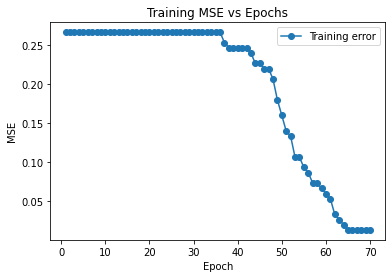

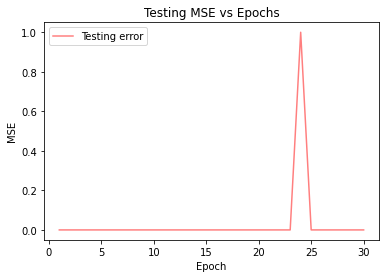

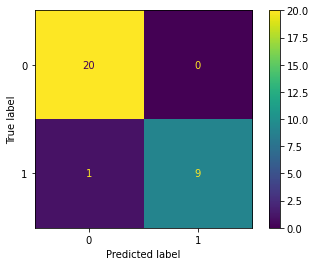

In [21]:

plt.plot(range(1, len(clf.errors_) + 1),
         clf.errors_, marker='o', label='Training error')
plt.title('Training MSE vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
# plt.ylim(ymin=0)
plt.legend()
plt.show()


plt.plot(range(1, len(y_pred) + 1), mse, 'r', label='Testing error', alpha=0.5)
plt.title('Testing MSE vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
# plt.ylim(ymin=0)
plt.legend()
plt.show()


## Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
cmd.plot(include_values=True, cmap='viridis')